In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
from collections import OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

sys.path.append('..')
from data import FEATURES
from evaluation import *
from plotting import plot_feature_ranking

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

## RF u, g, r, i

In [4]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-03-08_12:13:04.csv')
model_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-03-08_12:13:04.joblib')

In [5]:
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-03-08_12:32:50.csv')
model_z = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-03-08_12:32:50.joblib')

In [6]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

In [7]:
preds_clf['proba_max'] = preds_clf[['QSO_PHOTO', 'GALAXY_PHOTO', 'STAR_PHOTO']].max(axis=1)
preds_clf_top = preds_clf.loc[preds_clf['proba_max'] >= 0.8]

Multiclass classification results:
Accuracy = 0.9728
F1 per class = [ 0.9902  0.9385  0.9213]
Logloss = 0.1391


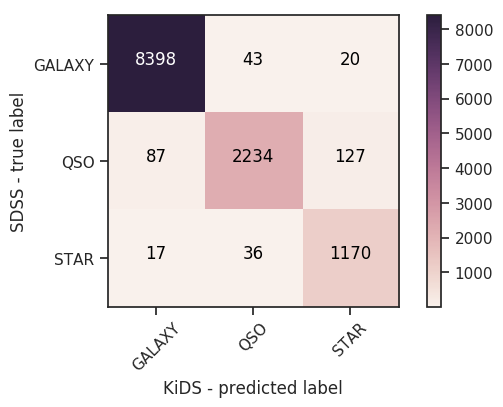

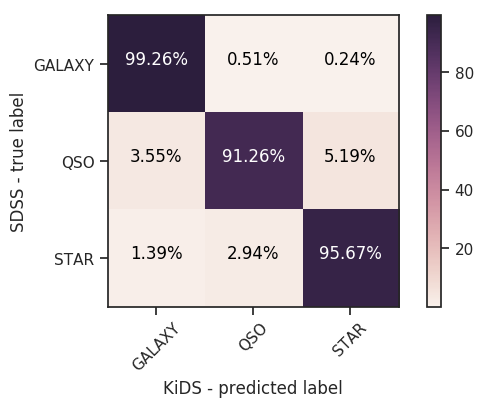

Binary classification results:
Predicted positives: 2313/12132 (19.07%)
Logloss = 0.1083
Accuracy = 0.9758
F1 = 0.9385
Precision = 0.9658
Recall = 0.9126
ROC AUC = 0.9886


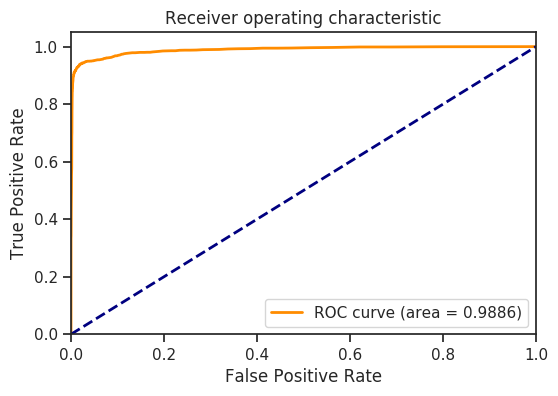

MSE: 0.1756
GALAXY: 0.0194, QSO: 0.4537, STAR: 0.6997
MAE: 0.2031
GALAXY: 0.0622, QSO: 0.4765, STAR: 0.6308


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


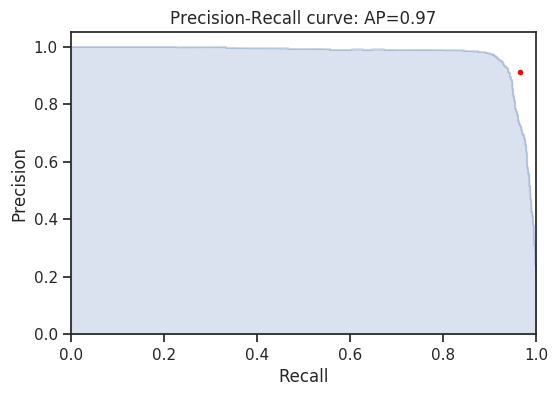

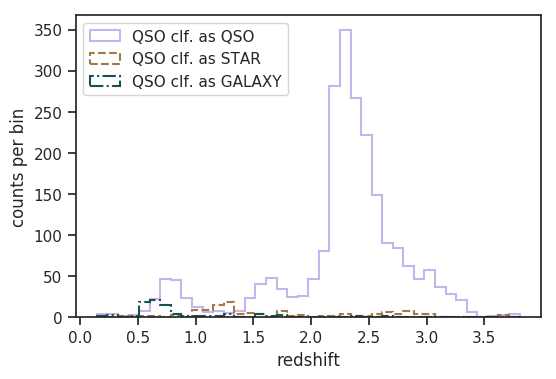

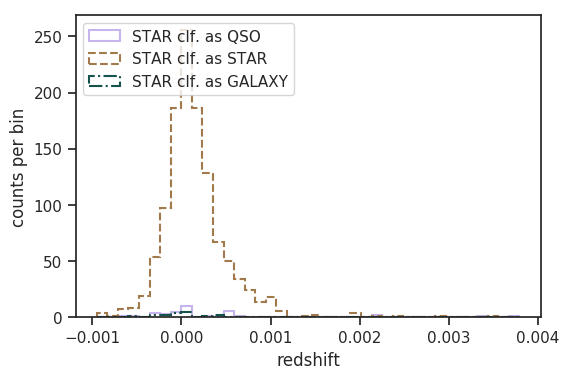

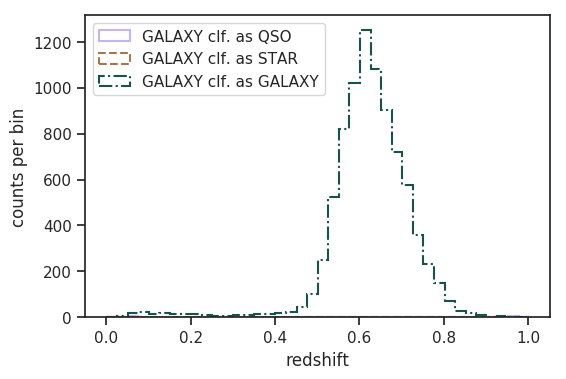

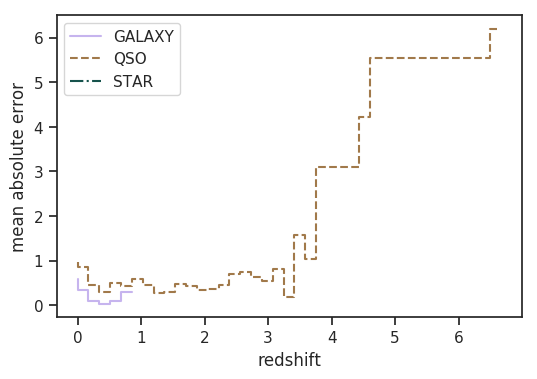

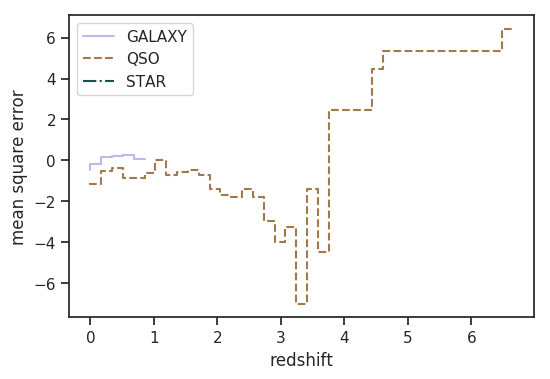

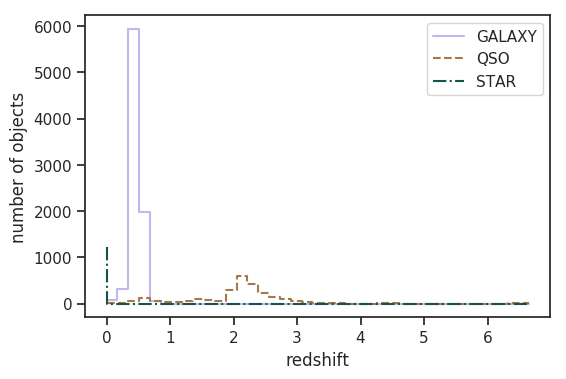

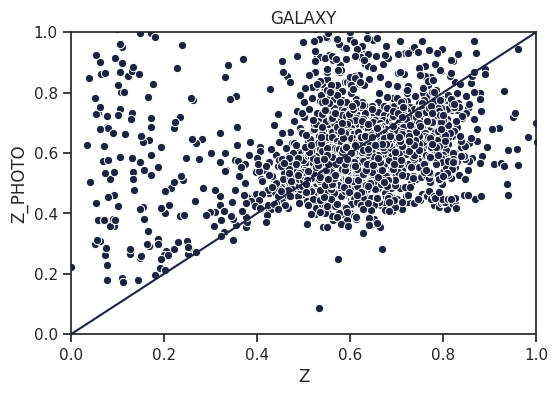

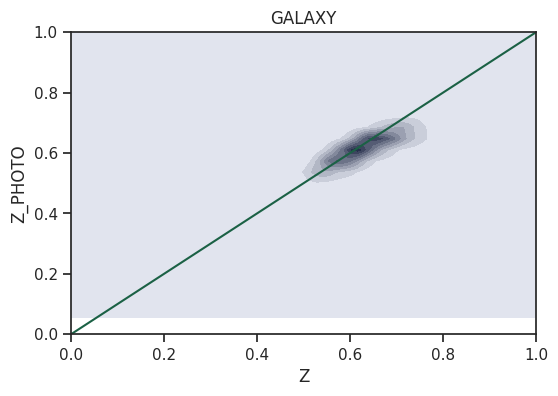

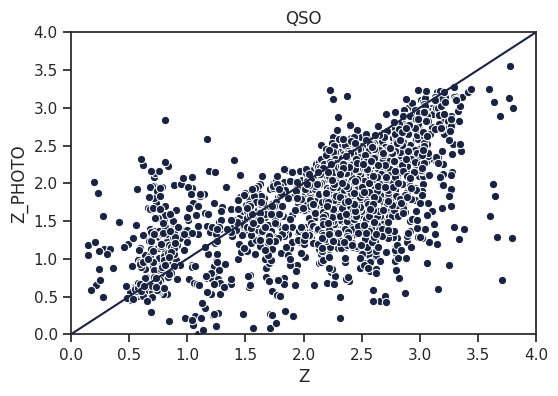

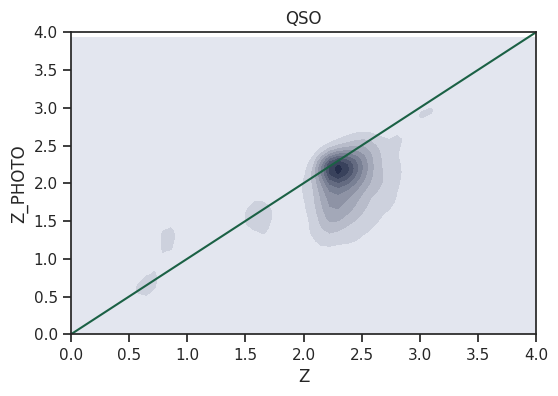

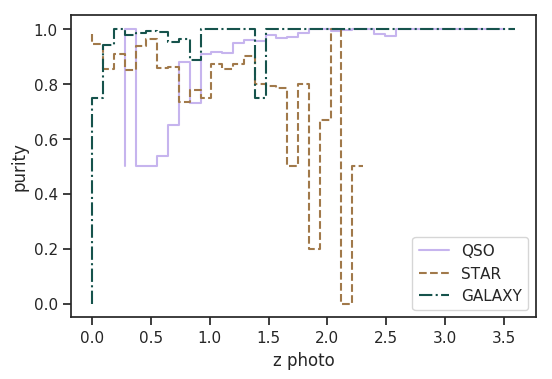

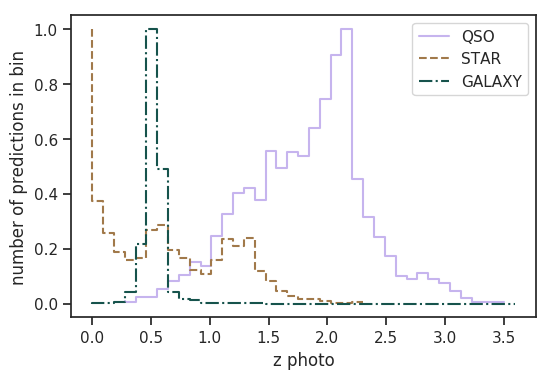

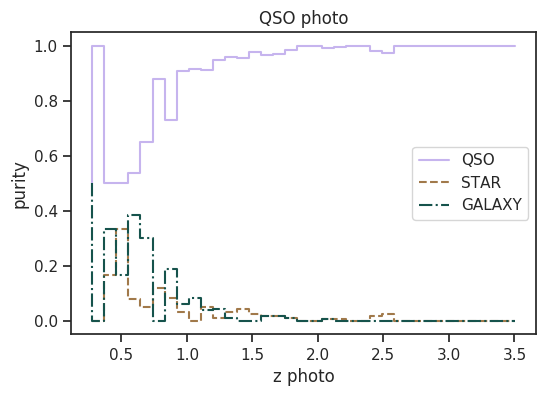

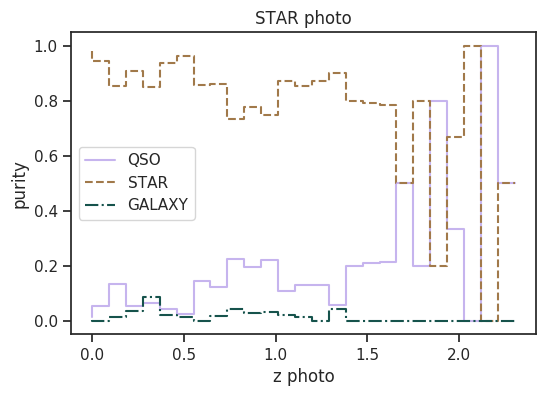

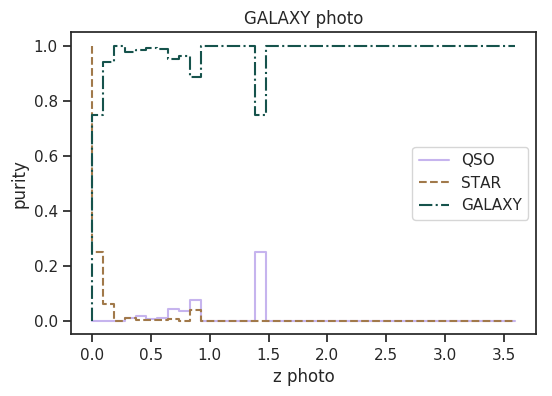

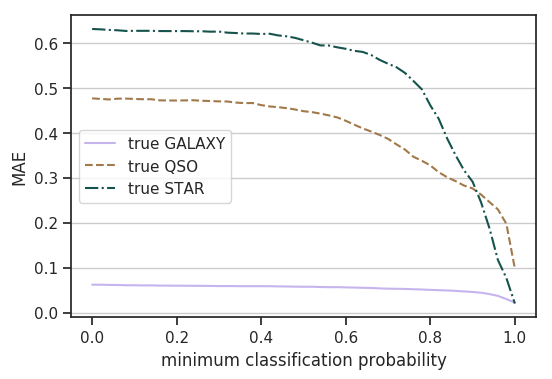

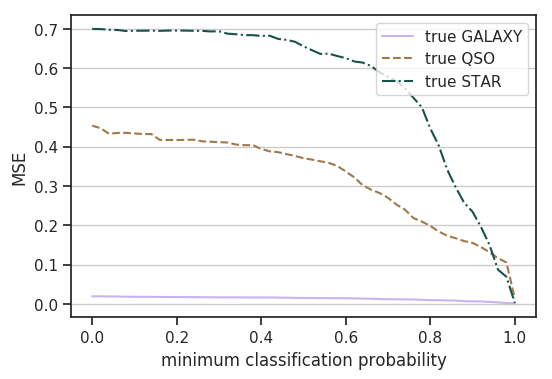

In [16]:
experiment_report(preds_clf, z_max=4)

Multiclass classification results:
Accuracy = 0.9870
F1 per class = [ 0.9947  0.9617  0.9605]
Logloss = 0.0892


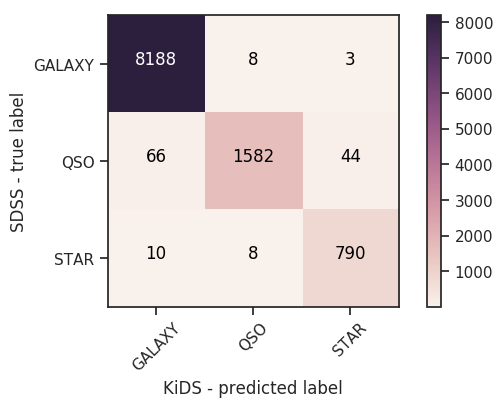

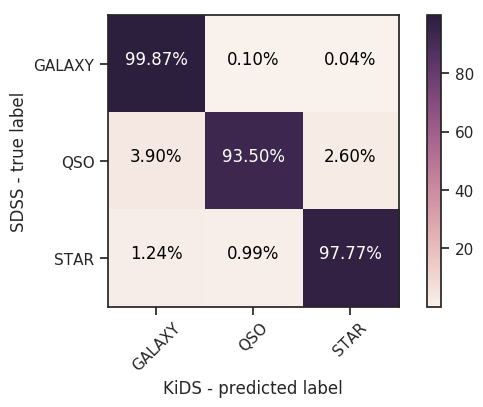

Binary classification results:
Predicted positives: 1598/10699 (14.94%)
Logloss = 0.0680
Accuracy = 0.9882
F1 = 0.9617
Precision = 0.9900
Recall = 0.9350
ROC AUC = 0.9895


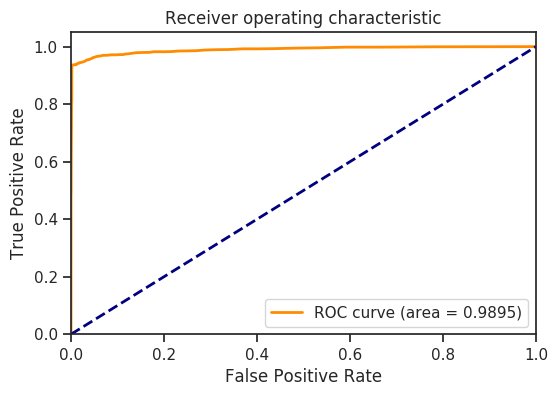

MSE: 0.0842
GALAXY: 0.01, QSO: 0.2648, STAR: 0.4582
MAE: 0.1291
GALAXY: 0.0513, QSO: 0.3432, STAR: 0.4709


../evaluation.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['binned'] = pd.cut(predictions['Z'], bin_edges)
../evaluation.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['residual'] = abs(predictions['Z'] - predictions['Z_PHOTO'])


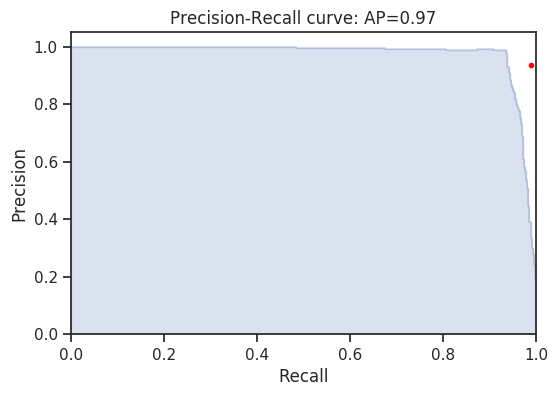

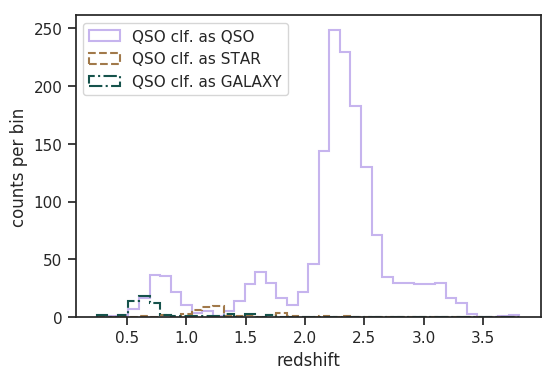

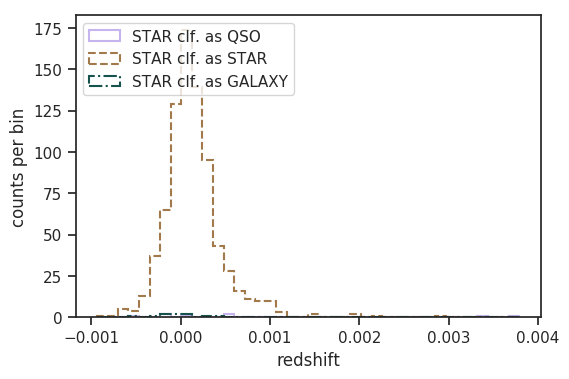

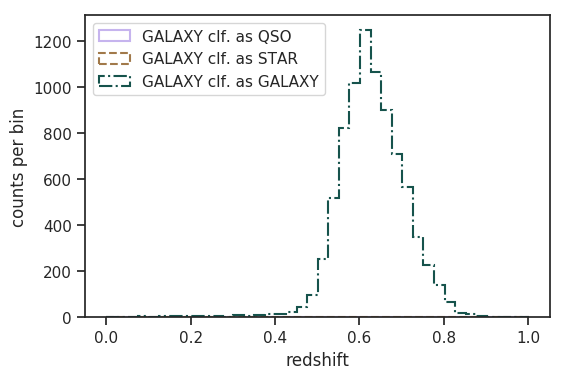

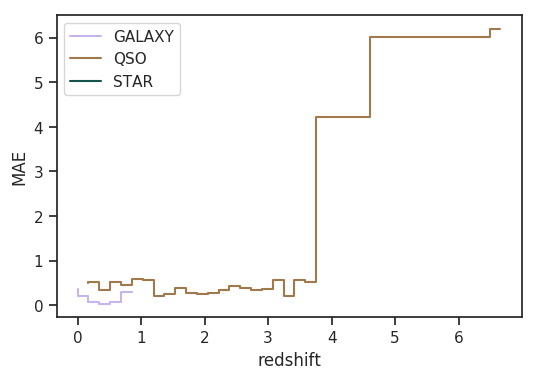

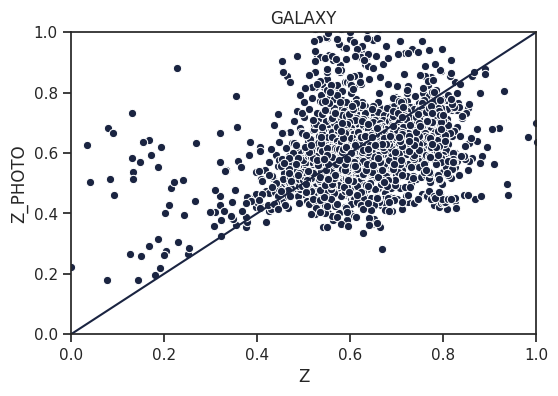

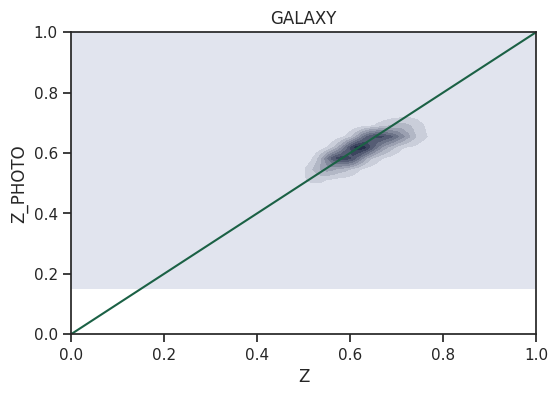

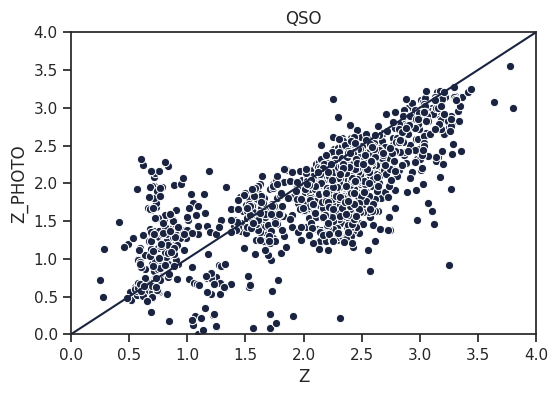

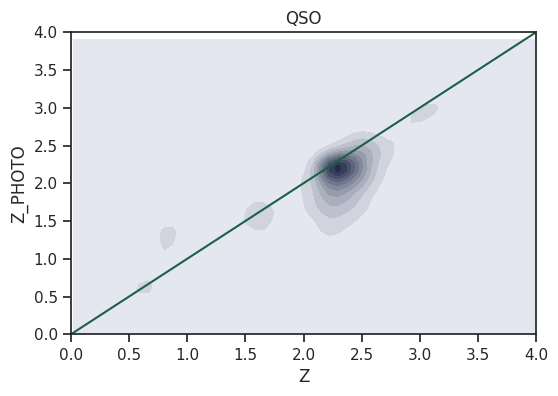

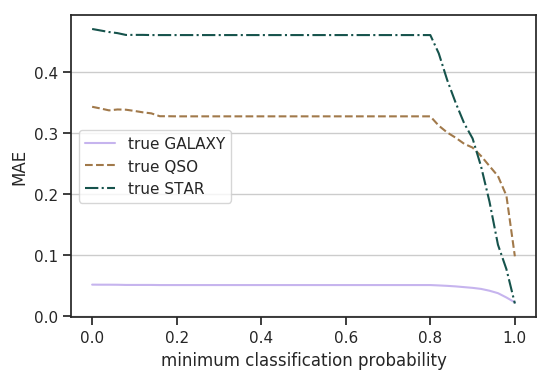

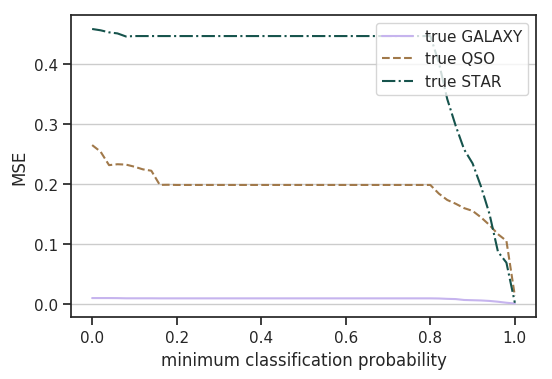

In [21]:
experiment_report(preds_clf_top, z_max=4)

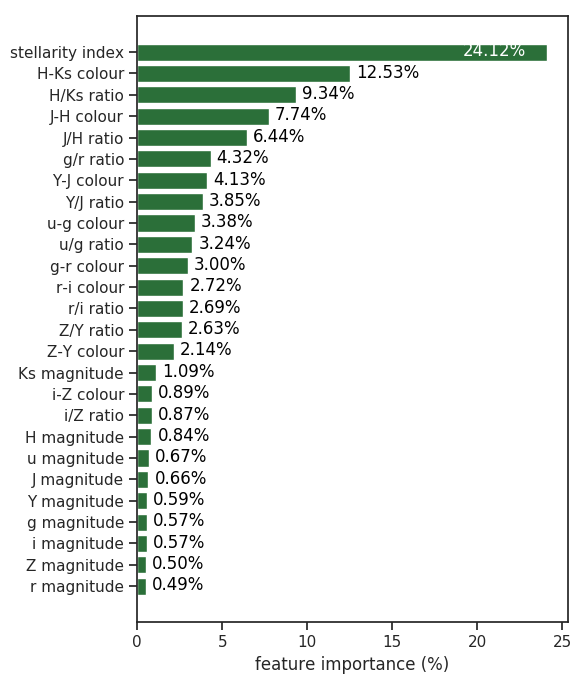

In [20]:
plot_feature_ranking(model_clf, FEATURES['all'])

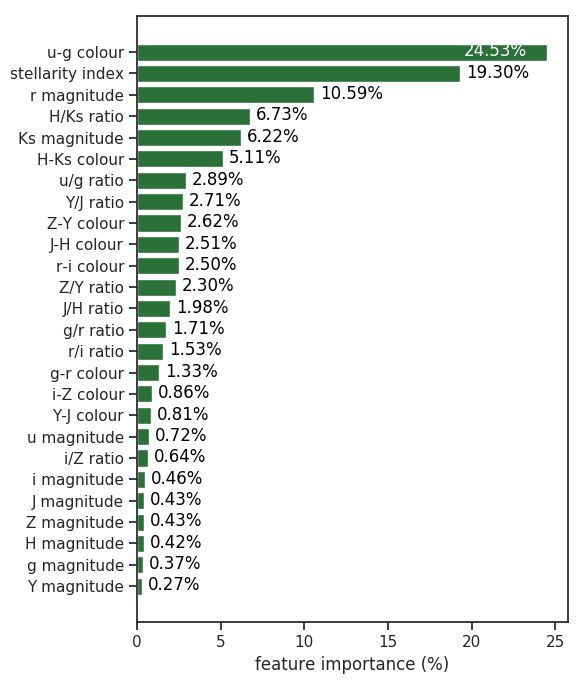

In [21]:
plot_feature_ranking(model_z, FEATURES['all'])

## RF g, r, i ; but cleaning with u

In [10]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:48:13.csv')
model_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:48:13.joblib')

In [11]:
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:49:38.csv')
model_z = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:49:38.joblib')

In [12]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

Multiclass classification results:
Accuracy = 0.9714
F1 per class = [ 0.99    0.936   0.9141]
Logloss = 0.1396


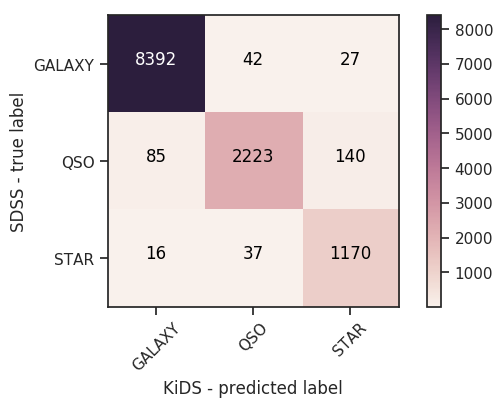

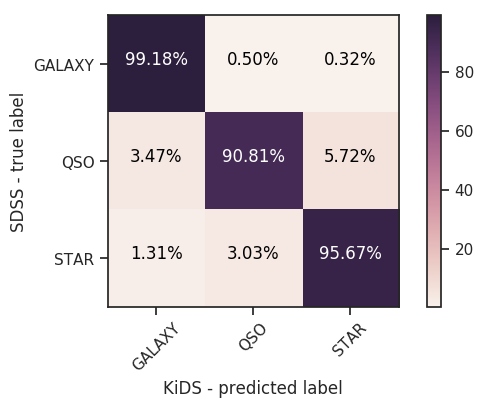

Binary classification results:
Predicted positives: 0/12132 (0.00%)
Logloss = 0.1082
ROC AUC = 0.9885


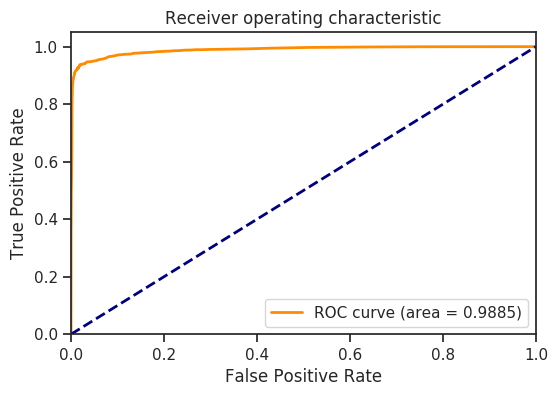

Accuracy = 0.7982
F1 = 0.0000
Precision = 0.0000
Recall = 0.0000
MSE: 0.1694
GALAXY: 0.031, QSO: 0.4977, STAR: 0.4698
MAE: 0.2059
GALAXY: 0.0726, QSO: 0.5184, STAR: 0.5027


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

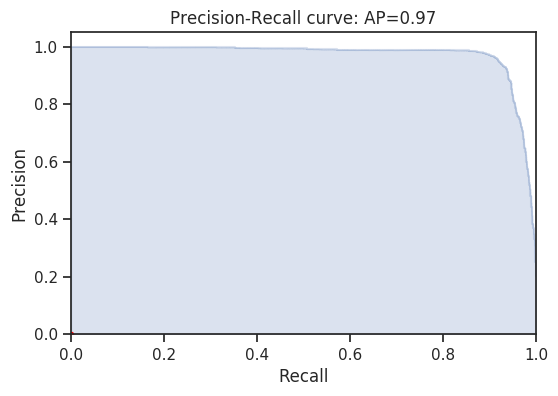

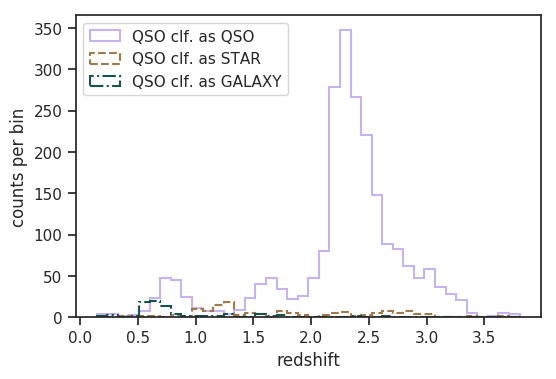

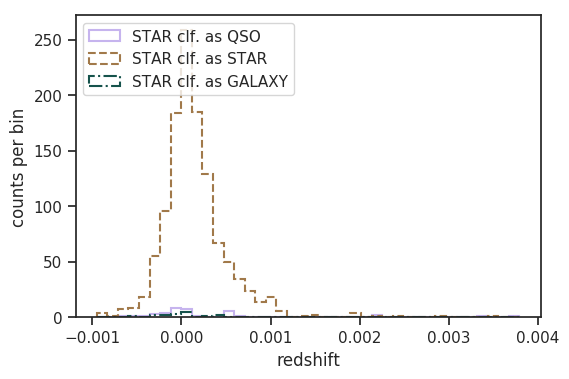

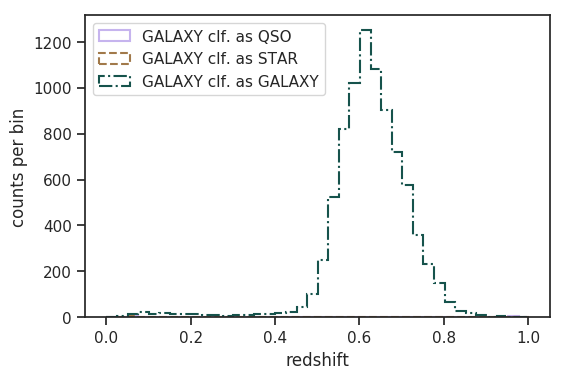

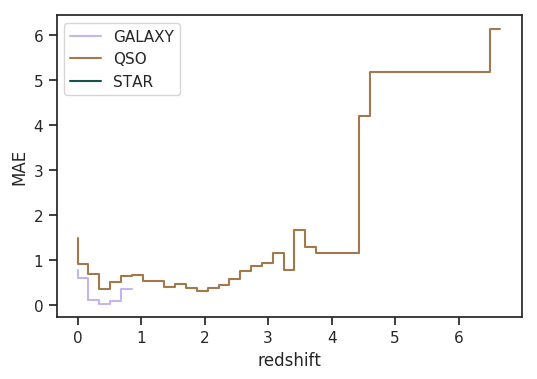

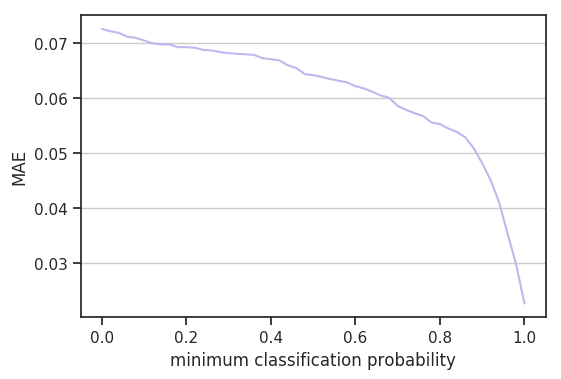

In [13]:
experiment_report(preds_clf, z_max=4)

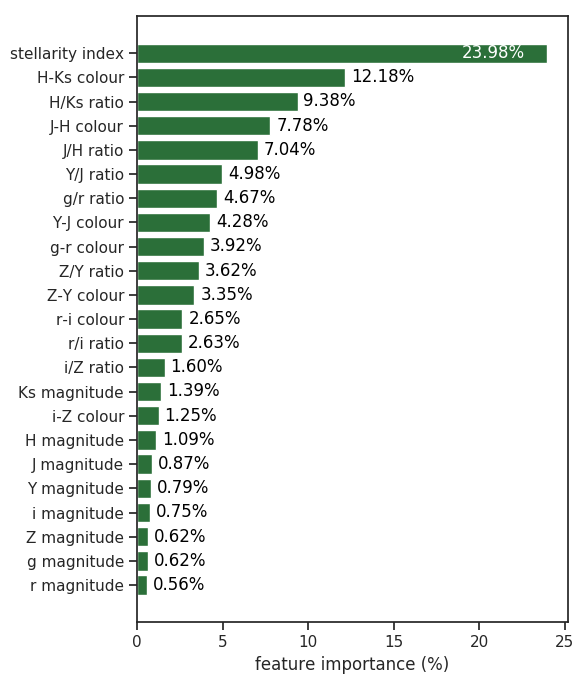

In [14]:
plot_feature_ranking(model_clf, FEATURES['no-u'])

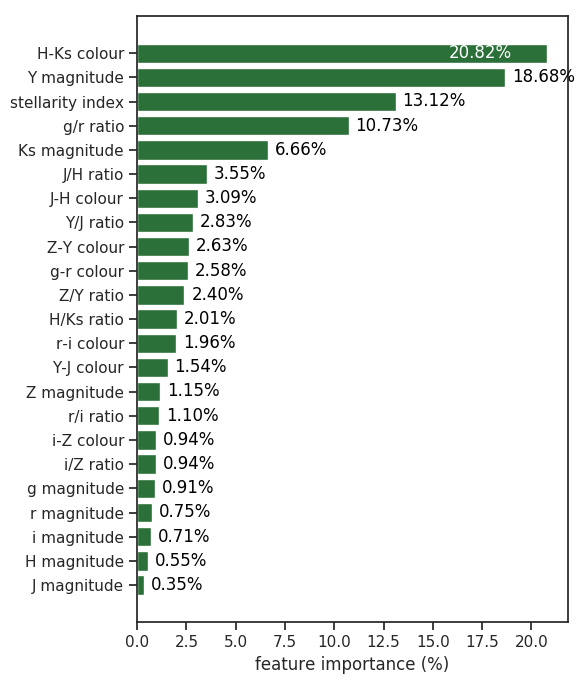

In [15]:
plot_feature_ranking(model_z, FEATURES['no-u'])

## RF g, r, i
### Classification

In [4]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:35:47.csv')
model_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:35:47.joblib')

In [5]:
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:34:27.csv')
model_z = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-no-u_test-magnitude__2019-03-11_17:34:27.joblib')

In [6]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

Multiclass classification results:
Accuracy = 0.9759
F1 per class = [ 0.9916  0.9372  0.9274]
Logloss = 0.1205


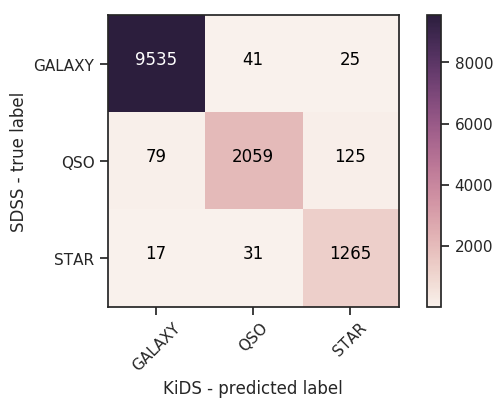

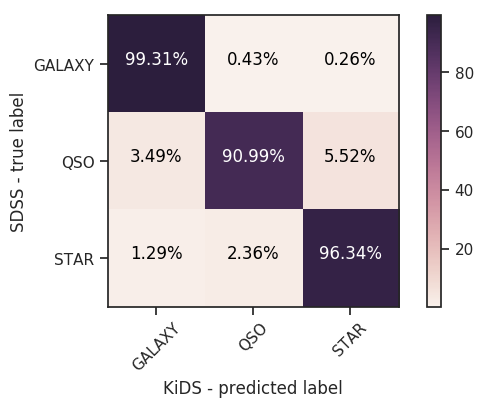

Binary classification results:
Predicted positives: 0/13177 (0.00%)
Logloss = 0.0962
ROC AUC = 0.9896


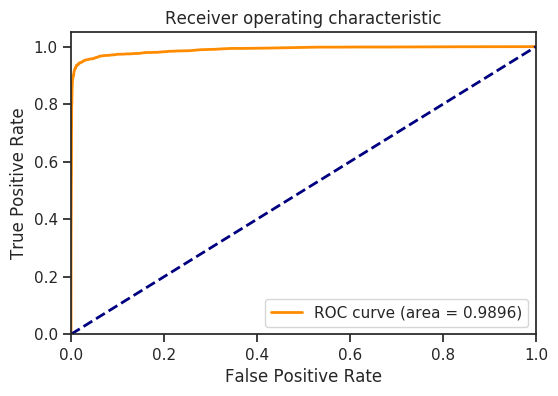

Accuracy = 0.8283
F1 = 0.0000
Precision = 0.0000
Recall = 0.0000
MSE: 0.1402
GALAXY: 0.022, QSO: 0.5222, STAR: 0.3456
MAE: 0.1679
GALAXY: 0.0608, QSO: 0.5078, STAR: 0.3655


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


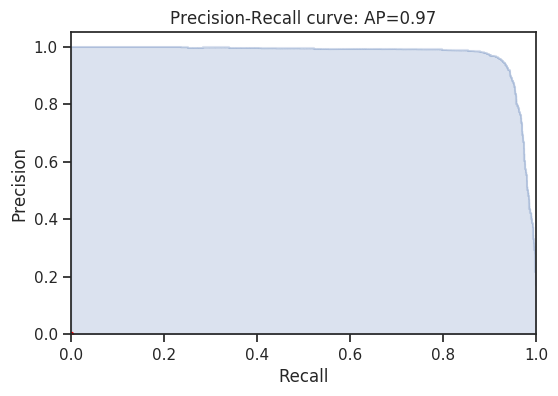

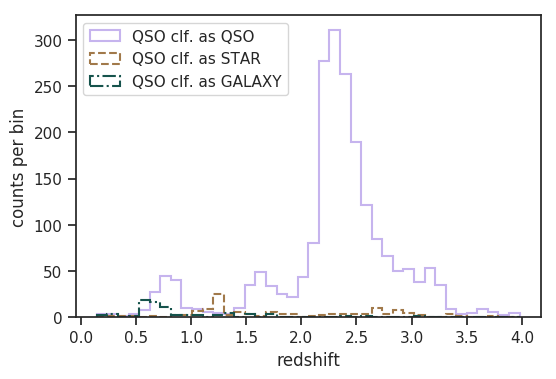

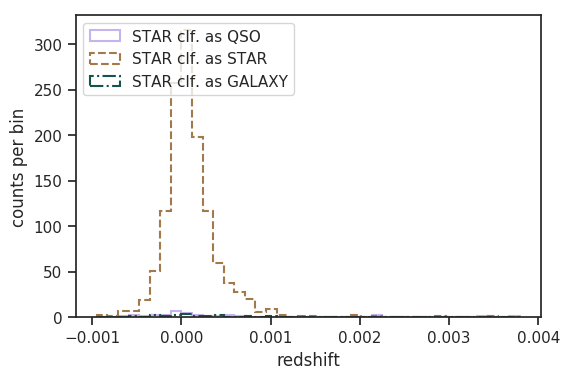

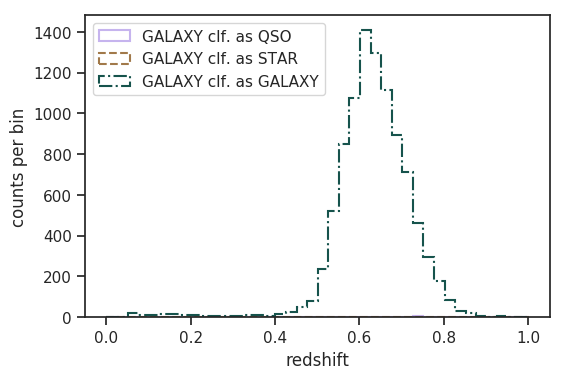

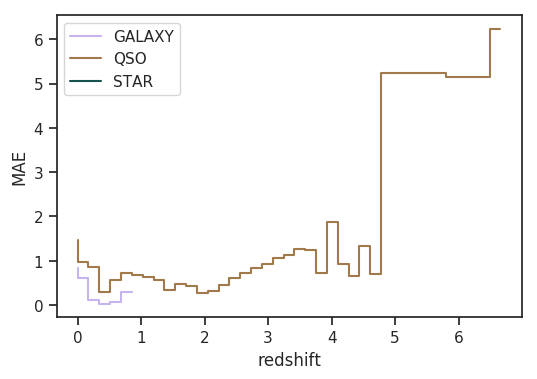

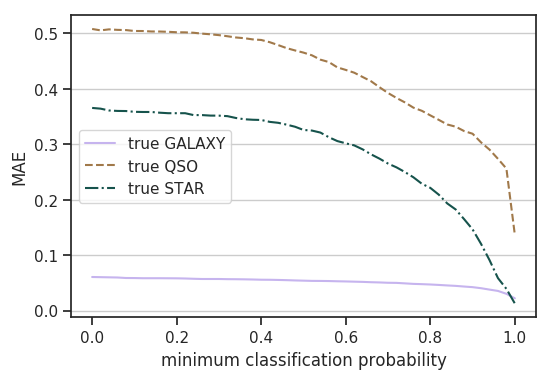

In [7]:
experiment_report(preds_clf, z_max=4)

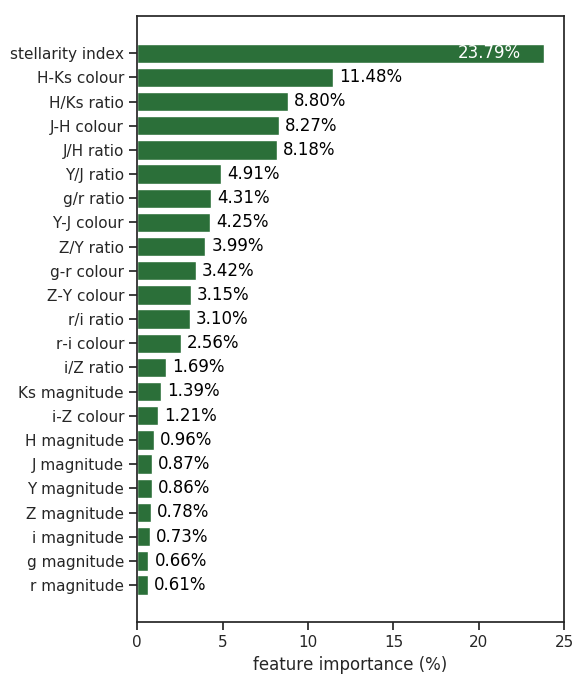

In [8]:
plot_feature_ranking(model_clf, FEATURES['no-u'])

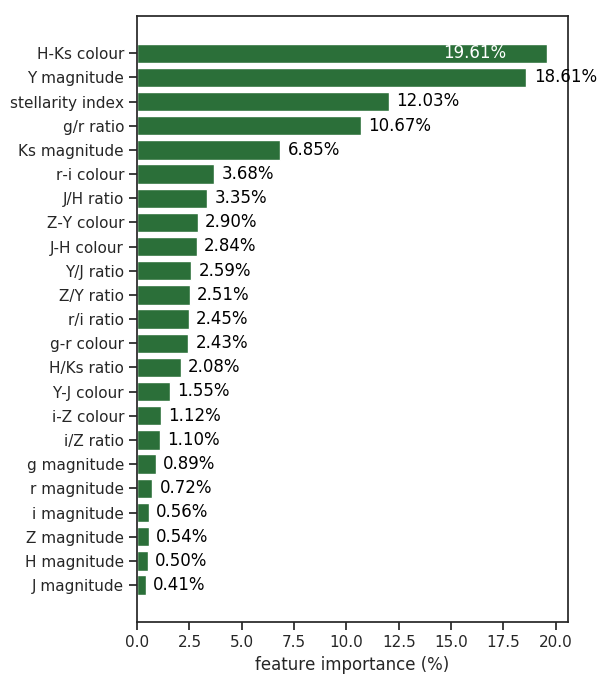

In [9]:
plot_feature_ranking(model_z, FEATURES['no-u'])

# DR3

## KiDS (mags + colors) vs. colors

In [13]:
preds_1 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_rcut__2018-03-05_14:13:44.csv')
preds_2 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_colors_cut__2018-03-05_13:59:06.csv')

In [14]:
id_intersection = np.intersect1d(preds_1['ID'], preds_2['ID'])
set_intersection = preds_1.loc[preds_1['ID'].isin(id_intersection)]
id_intersection.shape

(23188,)

In [15]:
print(np.unique(preds_1['CLASS'], return_counts=True))
print(np.unique(preds_2['CLASS'], return_counts=True))
print(np.unique(set_intersection['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12089,  4352,  7329]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12090,  4098,  7231]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12071,  3911,  7206]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9417
F1 per class = [0.9696 0.8699 0.9335]


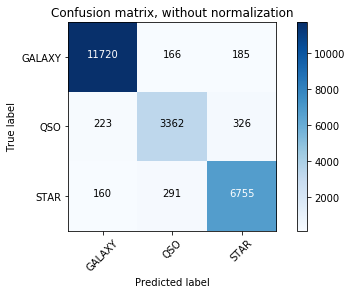

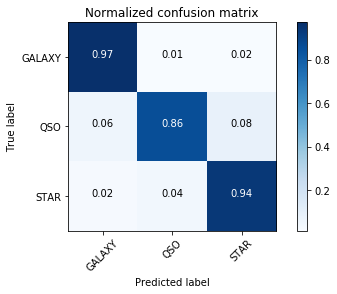

Binary classification results:
Predicted positives: 3819/23188 (16.47%)
logloss = 0.1573
ROC AUC = 0.9782


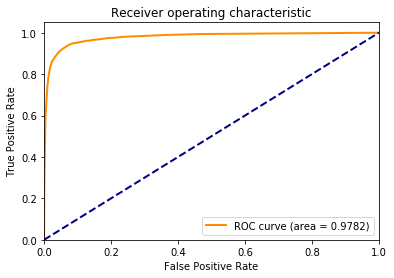

recall = 0.8596
accuracy = 0.9566
precision = 0.8803
f1 = 0.8699


In [16]:
classification_report(preds_1.loc[preds_1['ID'].isin(id_intersection)])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9311
F1 per class = [0.9636 0.8473 0.9217]


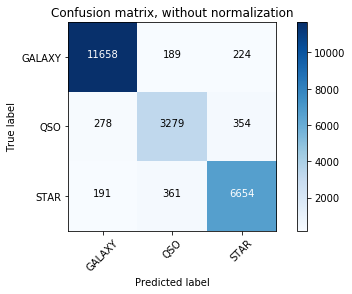

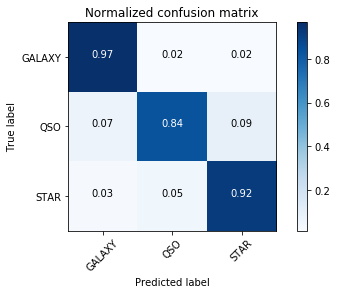

Binary classification results:
Predicted positives: 3829/23188 (16.51%)
logloss = 0.2087
ROC AUC = 0.9679


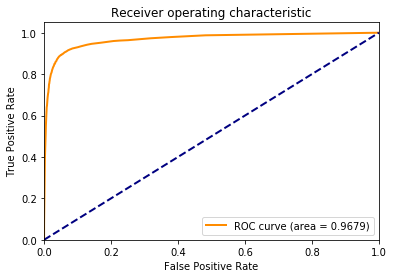

recall = 0.8384
accuracy = 0.9490
precision = 0.8564
f1 = 0.8473


In [17]:
classification_report(preds_2.loc[preds_2['ID'].isin(id_intersection)])

## Astronet
SDSS cleaned, mags+colors+class_star, R cut, all tiles

In [69]:
preds_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_astronet_f-all_cut-r__2018-08-03_17:07:55.csv')
# predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_astronet_f-all_cut-r__2018-08-03_16:41:18.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

Multiclass classification results:
Accuracy = 0.9353
F1 per class = [0.2368 0.9143 0.9532]
Logloss = 0.2187


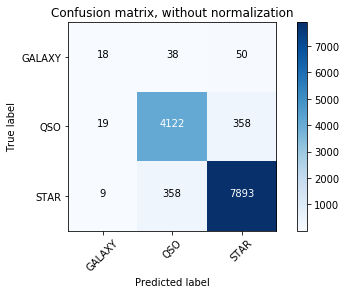

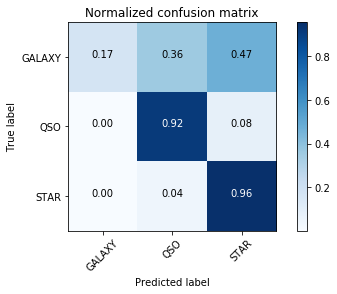

Binary classification results:
Predicted positives: 4518/12865 (35.12%)
logloss = 0.1812
ROC AUC = 0.9799


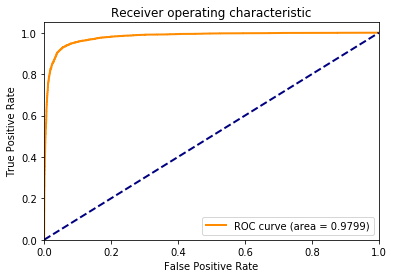

accuracy = 0.9399
f1 = 0.9143
precision = 0.9124
recall = 0.9162


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


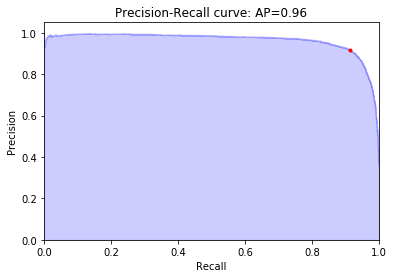

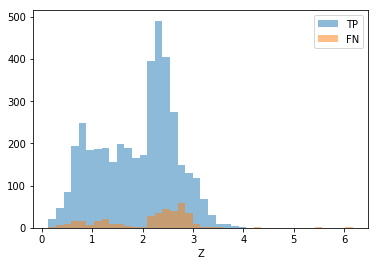

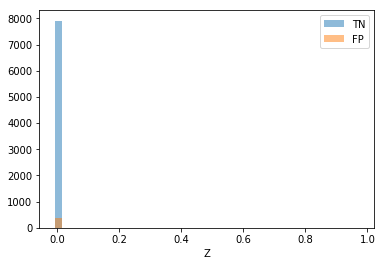

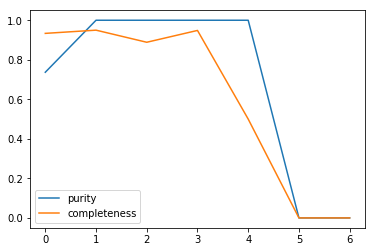

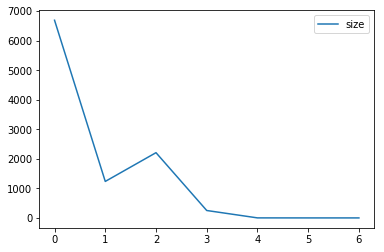

In [71]:
classification_report(preds_star)

In [ ]:
redshift_report(preds_star, data_path)

In [42]:
redshift_report(preds_star)

0.3013878945129163
binned
(-0.00795, 0.492]    8447
(0.492, 0.992]        706
(0.992, 1.492]        624
(1.492, 1.992]        616
(1.992, 2.492]       1394
(2.492, 2.992]        815
(2.992, 3.492]        238
(3.492, 3.992]         20
(3.992, 4.492]          2
(4.492, 4.992]          0
(4.992, 5.492]          0
(5.492, 5.992]          1
(5.992, 6.492]          1
dtype: int64
binned
(-0.00795, 0.492]    0.180922
(0.492, 0.992]       0.657218
(0.992, 1.492]       0.279898
(1.492, 1.992]       0.277766
(1.992, 2.492]       0.515351
(2.492, 2.992]       0.854958
(2.992, 3.492]       0.386559
(3.492, 3.992]       0.825786
(3.992, 4.492]       2.058323
(4.492, 4.992]            NaN
(4.992, 5.492]            NaN
(5.492, 5.992]       5.181839
(5.992, 6.492]       6.311743
Name: residual, dtype: float64


In [74]:
redshift_report(preds_star.loc[preds_star['class_pred'] == 'QSO'])

0.532804223442429
binned
(-0.00402, 0.496]     478
(0.496, 0.996]        654
(0.996, 1.496]        580
(1.496, 1.996]        600
(1.996, 2.496]       1300
(2.496, 2.996]        663
(2.996, 3.496]        222
(3.496, 3.996]         19
(3.996, 4.496]          1
dtype: int64
binned
(-0.00402, 0.496]    1.472156
(0.496, 0.996]       0.672953
(0.996, 1.496]       0.231188
(1.496, 1.996]       0.250664
(1.996, 2.496]       0.423064
(2.496, 2.996]       0.536479
(2.996, 3.496]       0.266810
(3.496, 3.996]       0.686561
(3.996, 4.496]       0.028782
Name: residual, dtype: float64


/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['residual'] = abs(predictions['Z'] - predictions['Z_pred'])
/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['binned'] = pd.cut(predictions['Z'], bins)


## No FLAG_BAND, one model

In [6]:
preds_path = 'outputs/exp_preds/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-10-04_14:52:42.csv'
model_path = 'outputs/exp_models/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-10-04_14:52:42.joblib'

In [7]:
predictions = pd.read_csv(preds_path)
model = joblib.load(model_path) 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Multiclass classification results:
Accuracy = 0.9656
F1 per class = [ 0.9884  0.8867  0.9493]
Logloss = 0.1406


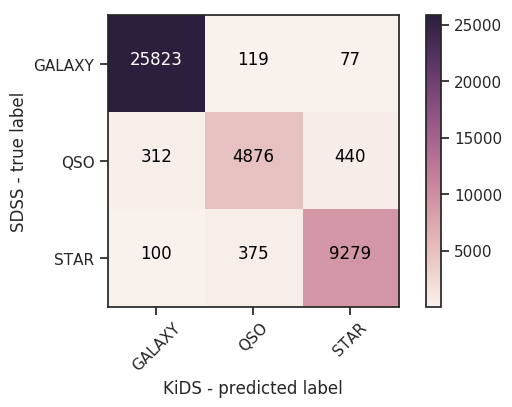

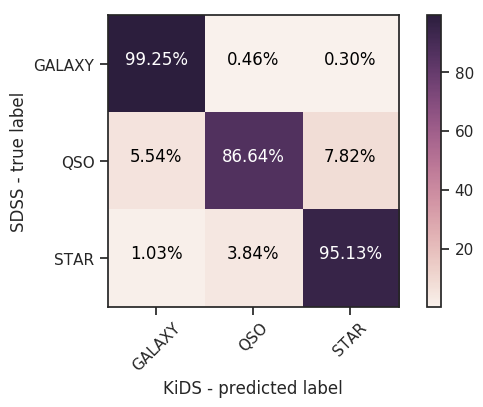

Binary classification results:
Predicted positives: 5370/41401 (12.97%)
logloss = 0.1061
ROC AUC = 0.9853


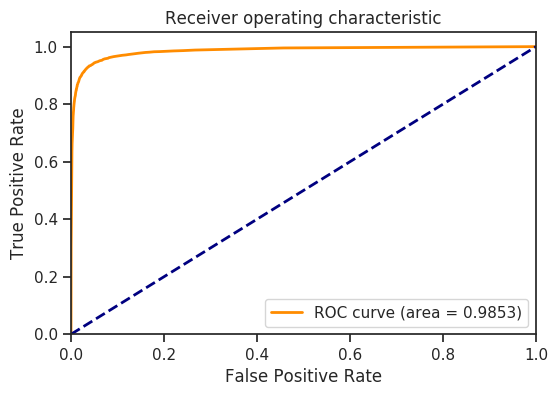

accuracy = 0.9699
f1 = 0.8867
precision = 0.9080
recall = 0.8664


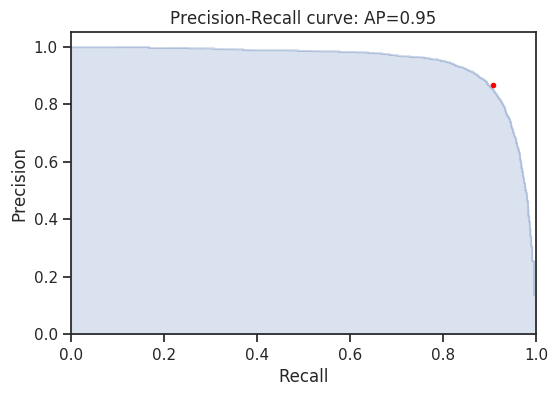

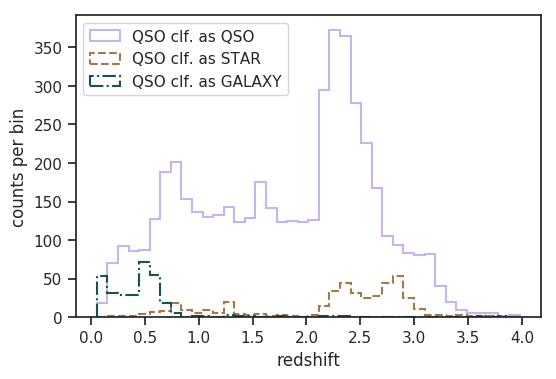

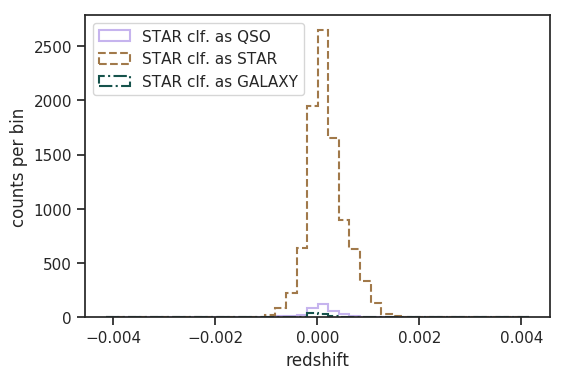

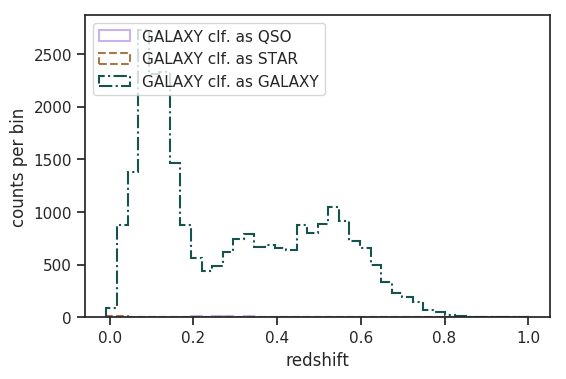

In [6]:
classification_report(predictions, z_max=4, true_label='SDSS')

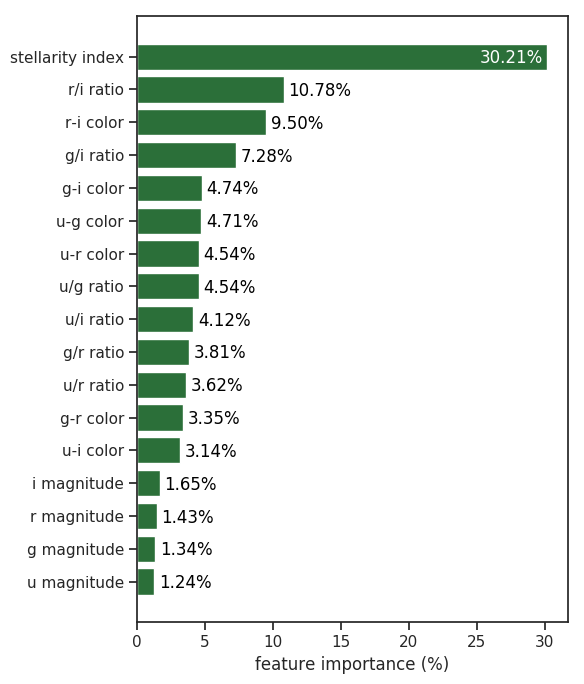

In [7]:
plot_feature_ranking(model, FEATURES['all'])

## No FLAG_BAND, one model, colors and ratios

In [61]:
preds_path = 'outputs/test_preds/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-no-mags_cut-u-g__2018-10-05_15:11:30.csv'
model_path = 'outputs/test_models/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-no-mags_cut-u-g__2018-10-05_15:11:30.joblib'

In [62]:
predictions = pd.read_csv(preds_path)
model = joblib.load(model_path) 

Multiclass classification results:
Accuracy = 0.9634
F1 per class = [ 0.9878  0.8721  0.9457]
Logloss = 0.1543


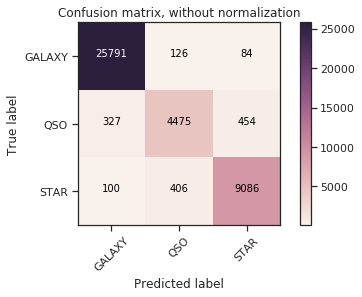

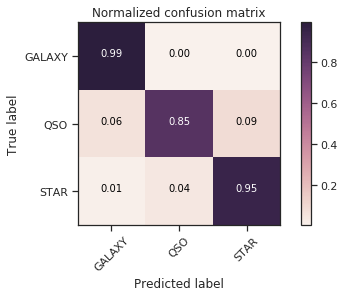

Binary classification results:
Predicted positives: 5007/40849 (12.26%)
logloss = 0.1114
ROC AUC = 0.9831


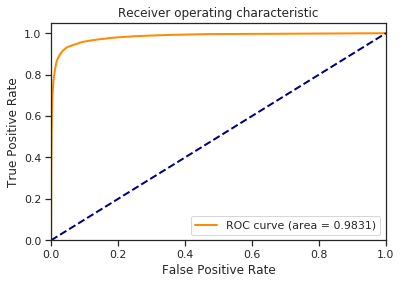

accuracy = 0.9679
f1 = 0.8721
precision = 0.8937
recall = 0.8514


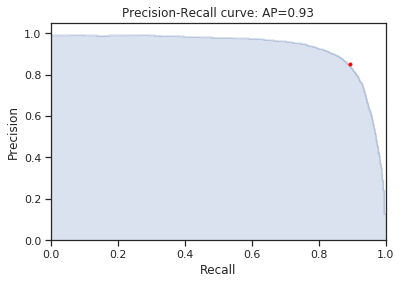

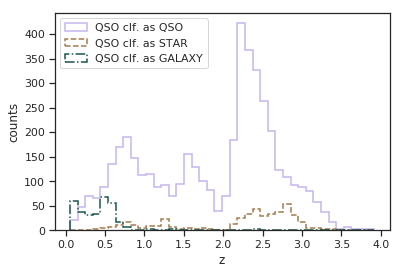

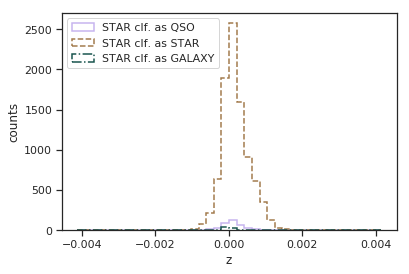

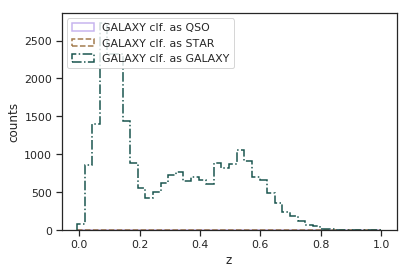

In [63]:
classification_report(predictions, z_max=4)

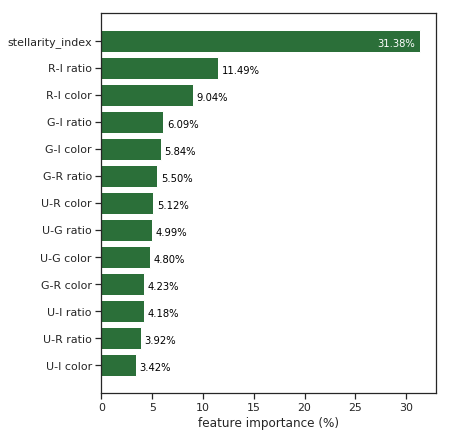

In [64]:
plot_feature_ranking(model, FEATURES['no-mags'])